###### An Array of Sequences

## Overview of Built-In Sequences 

Another way of grouping sequence types (instead of mutability):

*Container sequnces*
    Can hold items of different types, including nested containers, For example: *list, typles, collections.deque*
    
*Flat sequences*
    Hold items of one simple type. For example: *str* and *array.array*

In [1]:
(9.46, 'cat', [2.08, 4.29]) # The tuple has an array of references to its items
# each item is a seperate Python object, possibly holding references to other Python objects

(9.46, 'cat', [2.08, 4.29])

In [2]:
import array
arr = array.array('d', [9.46, 2.08, 4.29, 1]) 
#array of type float (d stands for double which corrensponds to python floats)
arr[0] =1

arr.append(1)
arr


array('d', [1.0, 2.08, 4.29, 1.0, 1.0])

Draw in Excalidraw pg. 23

- A *container sequence* holds references  to the objects it holds, which may be of any type.
- A *flat sequence* stores the value of its contents iin its own memory space, not as **distinct Python object**.

Every Python object in memory has a header with metadata.
Thus, flat sequences are more compact, but they limited to one simple type.

## List Comprehension

A quick way to build a sequence is using a list comprehension (*listcomps*).

Compare those two code snippets:

In [3]:
strings = ['Hello', 'world', 'again', 'bla']

length = []

for word in strings:
    length.append(len(word))
length

[5, 5, 5, 3]

In [4]:
length = [len(word) for word in strings]
length

[5, 5, 5, 3]

A for loop can be used to do many different things: scanning, count or any number of other tasks.
In contrast, a listcomp is more explicit. Its goal is **always** to build a new list.

## Mapping and Filtering with Listcomps 

In [5]:
[word.upper() for word in strings] # Mapping

['HELLO', 'WORLD', 'AGAIN', 'BLA']

Lets look at nested lists:

In [6]:
list_numbers = [[5, 6, 3], [8, 3, 1], [9, 10, 4], [8, 4, 2]]

Lets calculate the sum of each list by mapping each element to its length: 
```list_numbers -->  [14, 12, 23, 14]```

In [7]:
[sum(num) for num in list_numbers]

[14, 12, 23, 14]

In [8]:
length_gt_3 = [len(word) for word in strings if len(word) > 3] # filtering
length_gt_3

[5, 5, 5]

## Cartasian Products

![cartasian_prod](cartasian_prod.png)

In [9]:
A = ['x', 'y', 'z']
B = [1, 2, 3]

def cartasian_prod(A,B):
    result= []
    for item1 in A:
        for item2 in B:
            result.append((item1, item2))
    return result

cartasian_prod(A, B)
            

[('x', 1),
 ('x', 2),
 ('x', 3),
 ('y', 1),
 ('y', 2),
 ('y', 3),
 ('z', 1),
 ('z', 2),
 ('z', 3)]

Now let's do this with listcomps

In [10]:
def cartasian_prod(A, B):
    return[(item1, item2) for item1 in A
                           for item2 in B] 
# This generates a list of tuples arranged by letter,then numbers
    
cartasian_prod(A, B)

[('x', 1),
 ('x', 2),
 ('x', 3),
 ('y', 1),
 ('y', 2),
 ('y', 3),
 ('z', 1),
 ('z', 2),
 ('z', 3)]

In [11]:
def cartasian_prod(A, B):
    return[(item1, item2) for item2 in B
                           for item1 in A] 
# To get the items arranged by numbers, then letters, just rearrange the for clauses
    
cartasian_prod(A, B)

[('x', 1),
 ('y', 1),
 ('z', 1),
 ('x', 2),
 ('y', 2),
 ('z', 2),
 ('x', 3),
 ('y', 3),
 ('z', 3)]

### Building List of Lists



In [12]:
board = [ ['_'] * 3 for i in range(3)] # Create a list of three lists of three items each. Inspect the structure.
board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [13]:
board[1][2] = 'X'
board

[['_', '_', '_'], ['_', '_', 'X'], ['_', '_', '_']]

A tempting, but wrong, shortcut: 

In [14]:
weird_board = [ ['_'] * 3] * 3 # The outer list is made of three references to the same inner list.
weird_board[1][2] = 'O' # all rows are aliases referring to the same object, pg. 52
weird_board

[['_', '_', 'O'], ['_', '_', 'O'], ['_', '_', 'O']]

### list.sort Versus the sort Built-In

The list.*sort* method sorts a list in place. 

In contrast, the built-in function *sorted* creates a new list and returns it. 
It accepts any iterable object as an argument, including immutable sequences and generators. It always returns a newly created list.

Both list.*sort* and *sorted*  take two optional, keyword-only arguments: 

- reverse: accepts a boolean
- key: accepts a one-arguments function 

In [15]:
fruits = ['grape', 'raspberry', 'apple', 'banana']
sorted(fruits)

['apple', 'banana', 'grape', 'raspberry']

In [16]:
sorted(fruits, reverse=True)

['raspberry', 'grape', 'banana', 'apple']

In [17]:
sorted(fruits, key=len)

['grape', 'apple', 'banana', 'raspberry']

In [18]:
fruits.sort()
fruits

['apple', 'banana', 'grape', 'raspberry']

In [19]:
books = [('hello', 3), ('world', 1), ('again', 2)]

def sort_helper(item):
    return item[0]

sorted(books, key=sort_helper)

[('again', 2), ('hello', 3), ('world', 1)]

Now let's move on to the other fundamental sequence type in Python: the typle.

## Tuples Are Not Just Immuatable Lists

- used as immuatable lists
- used as records with no field names

### Tuples as Records

Tuples holds records: each item in the tuple holds the data for one field, and the position of the item gves its meaning.

In [20]:
lax_coordinates = (33.9425, -118.408056) # Latitude and Longitude of L.A. Airport

In [21]:
travelers_ids = [('USA', '934234'), ('BRA', '234324'), 
                 ('ESP', '124314')]  #List of tuples

In [22]:
for passport in sorted(travelers_ids): # iterate over sorted tuple  
    print('%s/%s' % passport) 
    # The % formatting operator understands tuples and treats each item as separate field.

BRA/234324
ESP/124314
USA/934234


In [23]:
for country, _ in travelers_ids: 
    print(country) 
    #The for loop knows how to retrieve the items of a tuple separately-this called unpacking

USA
BRA
ESP


## Classic Named Tuples

The collections.namedtuple functions builds a subclass of tuple enhanced with field names.

- Each instance of a class built by namedtuple takes exactly the same amount of memory as a tuple



In [24]:
from collections import namedtuple
City = namedtuple('City', 'name country population coordinates') #class name and field names
tokyo = City('Tokyo', 'JP', 13600000, (35.689722, 139.691667)) # Field values are passed as seperated positional
#arguments
tokyo

City(name='Tokyo', country='JP', population=13600000, coordinates=(35.689722, 139.691667))

In [25]:
tokyo.population #access the fields by name

13600000

In [26]:
tokyo.coordinates

(35.689722, 139.691667)

In [27]:
tokyo[1] #or access the fields by position

'JP'

In [28]:
tokyo._asdict() # returns a dict built from the named tuple instance

{'name': 'Tokyo',
 'country': 'JP',
 'population': 13600000,
 'coordinates': (35.689722, 139.691667)}

In [29]:
tokyo._replace(name='Berlin') #returns new typle

City(name='Berlin', country='JP', population=13600000, coordinates=(35.689722, 139.691667))

### Tuples as Immutable Lists

Two benefits:

- *Clarity*: you know its length will never change
- *Performance*: A tuple uses less memory than a list of the same length, and it allows Python to do some optimizations.
- fixed length: a tuple instance is allocated the exact memory space it needs.
- in contrast instances of list are allocated with room to spare in case for future appends

**!!!** References in a tuple cannot changed, but if one of those references points to a mutable object, and that object is changed, then the value of the tuple changes.

In [30]:
a = (10, 'alpha', [1, 2])
a[-1].append(99)


## When a List Is Not the Answer

The list type is flexible and easy to use, but depending on specific requirements, there are better options.

For example, if you are constantly adding and removing items from opposite ends of a list, it's good to know that a *deque* (double-ended queue) is a more efficient FIFO (First in, first out) data structure. 

## Deques

The *.append* and *.pop* methods make a list usable as a queue.


![q](queue.png)

But inserting and removing from the head of a list (0-index end) is costly because the entire list must be shifted in memory.

The class *collection.deque* is a queue designed for fast inserting and removing from both ends.

In [31]:
from collections import deque

dq = deque(range(9, 0, -1))
dq

deque([9, 8, 7, 6, 5, 4, 3, 2, 1])

In [32]:
dq.appendleft(10) #appends to the left
dq

deque([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

In [33]:
dq.pop()# pop only removes the last element
dq

deque([10, 9, 8, 7, 6, 5, 4, 3, 2])

In [34]:

dq = deque(range(10000, 0, -1))
%timeit dq.appendleft(None); dq.pop()

67.3 ns ± 0.774 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [35]:
l = list(range(10000))

%timeit l.append(None); l.pop(0)

1.58 µs ± 72.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [36]:
import timeit
N=10000
setup_queue=f"from collections import deque;dq = deque(range({N}, 0, -1))"
fifo_queue = "dq.appendleft(None); dq.pop()"

queue_time= timeit.repeat(setup = setup_queue, 
                     stmt = fifo_queue,
                     repeat = 3,
                     number = 1000)

queue_mean = sum(queue_time) /len(queue_time)


setup_list=f"l = list(range({N}, 0, -1))"
fifo_list = "l.append(None); l.pop(0)"

list_time = timeit.repeat(setup = setup_list, 
                     stmt = fifo_list,
                     repeat = 3,
                     number = 1000)

list_mean = sum(list_time) /len(list_time)

queue_mean, list_mean

(9.4979302957654e-05, 0.0014954636959979932)

In [37]:
def time_it(N):
    setup_queue=f"from collections import deque;dq = deque(range({N}, 0, -1))"
    fifo_queue = "dq.appendleft(None); dq.pop()"

    queue_time= timeit.repeat(setup = setup_queue, 
                     stmt = fifo_queue,
                     repeat = 3,
                     number = 1000)

    queue_mean = sum(queue_time) /len(queue_time)


    setup_list=f"l = list(range({N}, 0, -1))"
    fifo_list = "l.append(None); l.pop(0)"

    list_time = timeit.repeat(setup = setup_list, 
                     stmt = fifo_list,
                     repeat = 3,
                     number = 1000)

    list_mean = sum(list_time) /len(list_time)

    return queue_mean, list_mean

In [38]:
x = [10, 100, 1000, 10000, 100000]

for N in x:
    queue_r, list_r = time_it(N)


![](queue_vs_list.png)


Note that deque implements most of the list methods, and adds a few that are specific to its design, like appendleft.
But there is a hidden cost: removing items from the middle of a deque is not as fast.

# Higher Order Functions

- a function that takes a function as an argument

In the functional programming paradigma, some of the best known higher-order functions are map, filter, reduce.

(A listcomp does the job of map and filter combined, but is more readable)

### Map

In [39]:
import math
def exp(x):
    return math.exp(x)

x = [*range(10)]
y = list(map(exp, x))  #Calling map(function, iterable) returns an iterable where each item is the result of 
#calling the first arguement (here. exp) to successive elements of the second argument (an iterable), x.

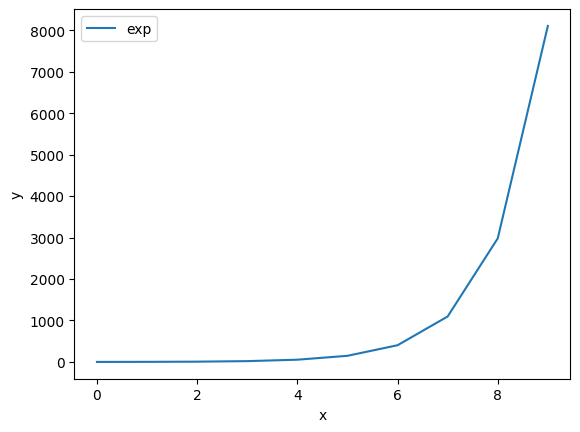

In [40]:
import matplotlib.pyplot as plt

plt.plot(x, y, label="exp")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Filter

In [41]:
def filter_helper(item):
    return item % 2

list(filter(filter_helper, range(6)))

[1, 3, 5]

### Map and Filter combined

In [42]:
list(map(exp, filter(filter_helper,range(6))))

[2.718281828459045, 20.085536923187668, 148.4131591025766]

In [43]:
[exp(x) for x in range(6) if x % 2]

[2.718281828459045, 20.085536923187668, 148.4131591025766]

### Reduce

In [44]:
from functools import reduce

def adding(accumulator, currentValue):
    #print(accumulator)
    return accumulator + currentValue

#reduce(adding, range(100), 100) #Initializer
reduce(adding, range(100))  #sum is preferd
sum(range(100))


4950

## Other Function Which Take Iterables As an Argument 

Other reducing built-ins are *all* and *any*

*all(iterable)*

    Returns True if there are no falsy elements in the iterable; all([]) returns True

In [45]:
all([]) 

True

*any(iterable)*

    Returns True if any element of the iterable is truthy; any([]) returns False.

In [46]:
any([['a']])

True

### The Awesome zip

Having a for loop that iterates over items without fiddling with index
variables is great and prevents lots of bugs, but demands some special
utility functions.
One of them is the zip built-in, which makes it easy to
iterate in parallel over two or more iterables by returning tuples that you
can unpack into variables, one for each item in the parallel inputs.

In [47]:
zip(range(3), 'ABC')

In [48]:
list(zip(range(3), 'ABC'))

[(0, 'A'), (1, 'B'), (2, 'C')]

In [49]:
list(zip(range(3), 'ABC', [0.0, 1.1, 2.2, 3.3])) #list(zip(range(3), 'ABC', [0.0, 1.1, 2.2, 3.3]))

[(0, 'A', 0.0), (1, 'B', 1.1), (2, 'C', 2.2)]

In [50]:
from itertools import zip_longest

'''The itertools.zip_longest function behaves differently: it
uses an optional fillvalue (None by default) to complete
missing values so it can generate tuples until the last iterable is
exhausted.'''
list(zip_longest(range(3), 'ABC', [0.0, 1.1, 2.2, 3.3],
fillvalue=-1))

[(0, 'A', 0.0), (1, 'B', 1.1), (2, 'C', 2.2), (-1, -1, 3.3)]

- zip silently stopping at the shortest iterable
- bad behavior: Silently ignoring part of the input can cause subtle bugs. 
- An optional strict argument to zip to make it behave in that way. It is implemented in Python 3.10.

In [51]:
#list(zip(range(3), 'ABC', [0.0, 1.1, 2.2, 3.3], strict=True))

The zip function can also be used to transpose a matrix represented as
nested iterables. For example:



In [52]:
a = [(1, 2, 3),
    (4, 5, 6)]

list(zip(*a))



[(1, 4), (2, 5), (3, 6)]

In [53]:
b = [(1, 2),
     (3, 4),
     (5, 6)]
list(zip(*b))

[(1, 3, 5), (2, 4, 6)]


![](Matrix_transpose.gif)

In [54]:
A = [(1,3,5), 
     (2,4,6)]
list(zip(*A))

[(1, 2), (3, 4), (5, 6)]

### enumerate

*enumerate(iterable, start=0)* Yields 2-tuples of the form (index, item), where index is counter from start, and items is taken from the iterable

In [55]:
list(enumerate('albatroz', 1))#Number the letters in the word, starting from 1.

[(1, 'a'),
 (2, 'l'),
 (3, 'b'),
 (4, 'a'),
 (5, 't'),
 (6, 'r'),
 (7, 'o'),
 (8, 'z')]